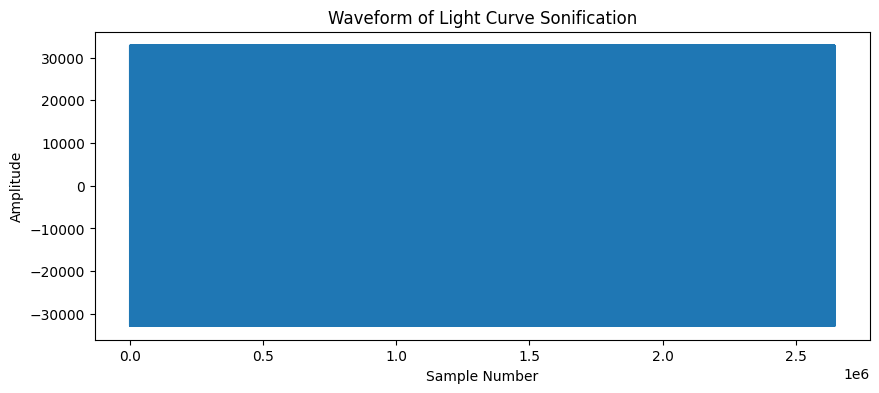

Audio generated and saved as large_light_curve_sonification.wav


In [13]:
import pandas as pd
import numpy as np
from pydub import AudioSegment
from pydub.generators import Sine
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

# Step 1: Load the light curve data from a CSV file
# Replace 'light_curve.csv' with the path to your CSV file
df = pd.read_csv('large_light_curve_sample.csv')

# Step 2: Extract the flux (brightness) values
# Assuming the CSV has a column named 'flux'
flux_values = df['flux'].values

# Step 3: Remove NaN values from the flux (if any)
flux_values = flux_values[~np.isnan(flux_values)]

# Step 4: Normalize the flux values to a range suitable for sound frequency mapping
min_flux = np.min(flux_values)
max_flux = np.max(flux_values)
normalized_flux = (flux_values - min_flux) / (max_flux - min_flux)

# Step 5: Map the normalized flux to a frequency range (e.g., 200 Hz to 2000 Hz)
min_freq = 200  # Minimum frequency in Hz
max_freq = 2000  # Maximum frequency in Hz
frequencies = min_freq + normalized_flux * (max_freq - min_freq)

# Step 6: Create an empty audio segment to hold the final sound
audio = AudioSegment.silent(duration=0)

# Step 7: Generate sound for each data point in the light curve
duration_ms = 50  # Each data point will correspond to a 50ms tone

for freq in frequencies:
    tone = Sine(freq).to_audio_segment(duration=duration_ms)
    audio += tone

# Step 8: Export the generated audio to a file
output_filename = 'large_light_curve_sonification.wav'
audio.export(output_filename, format='wav')

# Step 9: Visualize the generated sound
# Read the generated audio file
sample_rate, data = wav.read(output_filename)

# Plot the waveform of the audio file
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Waveform of Light Curve Sonification')
plt.xlabel('Sample Number')
plt.ylabel('Amplitude')
plt.show()

print(f"Audio generated and saved as {output_filename}")


In [14]:
df

,time,flux
0,0.000000,1000.000000
1,0.050042,1001.571847
2,0.100083,1003.142141
3,0.150125,1004.709328
4,0.200167,1006.271861
...,...,...
1195,59.799833,993.728139
1196,59.849875,995.290672
1197,59.899917,996.857859
1198,59.949958,998.428153
